# Unsupervised Learning.

- It is a type of machine learning in which models are trained using unlabelled dataset.
- Two types
    - Clustering.
        - Grouping similar datapoints to clusters.
        - KMeans Clustering.
    - Association.
    
    
## Kmeans Clustering.

- K refers to no of clusters.
    - To select the optimal value of K,use elbow method Steps involved:
        - Choose the value of k.
        - Choose the centroids.
        - Calculate the distance and mean.

## Step1: Importing all the required modules and packages.

In [63]:
## Importing all the required modules and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step2: Loading a dataset called Breast_cancer_data.csv from kaggle.com.

## Link for dataset: https://www.kaggle.com/merishnasuwal/breast-cancer-prediction-dataset

In [4]:
## Loading a dataset called Breast_cancer_data.csv from kaggle.com

df = pd.read_csv("Breast_cancer_data.csv")
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [5]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


## Step3: Perform analysis on data set.

In [6]:
## Checking the info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


## Step4: Handling the duplicates and null values in the data set.

In [7]:
## Checking for null values

df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [8]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


## Step5: Standardize the data set by using different scaling methods.

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
 6   target           569 non-null    int64  
 7   pred_target      569 non-null    int32  
dtypes: float64(5), int32(1), int64(2)
memory usage: 33.5 KB


## Since all the data is in similar type(integer) so no need for scaling techniques.

## Step6: Choosing the features and target values.

In [16]:
x = df[["mean_radius","mean_texture","mean_perimeter","mean_area","mean_smoothness"]]
target = df["diagnosis"]

## Step7: Applying the model(KMeans Clustering) to the data and finging the sum of 

## squared errors(SSE).

In [17]:
from sklearn.cluster import KMeans
k = range(1,11)
l = []
for i in k:
    model = KMeans(n_clusters=i,random_state=42)
    model.fit(x)
    sse = model.inertia_
    l.append(sse)
    print("The value of sse for k = {} is {}".format(i,sse))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


The value of sse for k = 1 is 70696070.48392473
The value of sse for k = 2 is 21265245.789111443
The value of sse for k = 3 is 13186138.938981554
The value of sse for k = 4 is 7444497.416802979
The value of sse for k = 5 is 4981055.423432599
The value of sse for k = 6 is 3622187.5696875853
The value of sse for k = 7 is 2633736.52970826
The value of sse for k = 8 is 1923238.734914356
The value of sse for k = 9 is 1489280.0969981167
The value of sse for k = 10 is 1194854.973676251


## Step8: Plot the graph for Number of clusters and SSE.

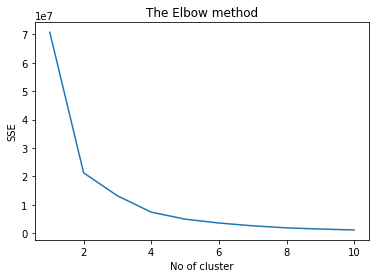

In [67]:
plt.plot(k,l)
plt.title("The Elbow method")
plt.xlabel("No of cluster")
plt.ylabel("SSE")
plt.show()

## Step9: We choose the optimal number of centers based on the elbow method.

## Based on the elbow method we take the n_clusters as 4.

## Applying the model to the data.

In [43]:
## Applying the model to the dataset

from sklearn.cluster import KMeans
model = KMeans(n_clusters=4,random_state=42)
model.fit(x)

KMeans(n_clusters=4, random_state=42)

In [44]:
centers = model.cluster_centers_
centers

array([[1.13533918e+01, 1.80822015e+01, 7.29413060e+01, 4.00244403e+02,
        9.51011940e-02],
       [1.92218627e+01, 2.18407843e+01, 1.26934314e+02, 1.15263922e+03,
        9.99766667e-02],
       [2.46661538e+01, 2.21392308e+01, 1.65192308e+02, 1.90430769e+03,
        1.06818462e-01],
       [1.45937097e+01, 1.94312366e+01, 9.50930645e+01, 6.61511828e+02,
        9.54603226e-02]])

In [45]:
target.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [46]:
df["target"]= target

In [68]:
df.drop("diagnosis", inplace= True, axis=1)

In [69]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,target,pred_target
0,17.99,10.38,122.80,1001.0,0.11840,0,1
1,20.57,17.77,132.90,1326.0,0.08474,0,1
2,19.69,21.25,130.00,1203.0,0.10960,0,1
3,11.42,20.38,77.58,386.1,0.14250,0,0
4,20.29,14.34,135.10,1297.0,0.10030,0,1


In [70]:
df["pred_target"]=model.predict(x)
y = model.predict(x)

In [71]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,target,pred_target
0,17.99,10.38,122.80,1001.0,0.11840,0,1
1,20.57,17.77,132.90,1326.0,0.08474,0,1
2,19.69,21.25,130.00,1203.0,0.10960,0,1
3,11.42,20.38,77.58,386.1,0.14250,0,0
4,20.29,14.34,135.10,1297.0,0.10030,0,1


In [72]:
df["pred_target"].value_counts()

0    268
3    186
1    102
2     13
Name: pred_target, dtype: int64

## Finding the silhoutte coefficient to check whether the data is predicted correctly or not.

## +1 -> incorrectly predicted.

## -1 -> clustered.

## 0 -> overlapping.

In [52]:
from sklearn.metrics import silhouette_score
silhouette_score(x,y)

0.5587596929647125

In [53]:
df1 = df[df.pred_target == 0]
df2 = df[df.pred_target == 1]
df3 = df[df.pred_target == 2]
df4 = df[df.pred_target == 3]

In [54]:
df1

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,target,pred_target
3,11.420,20.38,77.58,386.1,0.14250,0,0,0
5,12.450,15.70,82.57,477.1,0.12780,0,0,0
8,13.000,21.82,87.50,519.8,0.12730,0,0,0
9,12.460,24.04,83.97,475.9,0.11860,0,0,0
20,13.080,15.71,85.63,520.0,0.10750,1,1,0
...,...,...,...,...,...,...,...,...
556,10.160,19.59,64.73,311.7,0.10030,1,1,0
557,9.423,27.88,59.26,271.3,0.08123,1,1,0
559,11.510,23.93,74.52,403.5,0.09261,1,1,0
561,11.200,29.37,70.67,386.0,0.07449,1,1,0


In [55]:
df2

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,target,pred_target
0,17.99,10.38,122.8,1001.0,0.11840,0,0,1
1,20.57,17.77,132.9,1326.0,0.08474,0,0,1
2,19.69,21.25,130.0,1203.0,0.10960,0,0,1
4,20.29,14.34,135.1,1297.0,0.10030,0,0,1
6,18.25,19.98,119.6,1040.0,0.09463,0,0,1
...,...,...,...,...,...,...,...,...
535,20.55,20.86,137.8,1308.0,0.10460,0,0,1
563,20.92,25.09,143.0,1347.0,0.10990,0,0,1
564,21.56,22.39,142.0,1479.0,0.11100,0,0,1
565,20.13,28.25,131.2,1261.0,0.09780,0,0,1


In [56]:
df3

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,target,pred_target
82,25.22,24.91,171.5,1878.0,0.10630,0,0,2
122,24.25,20.20,166.2,1761.0,0.14470,0,0,2
164,23.27,22.04,152.1,1686.0,0.08439,0,0,2
180,27.22,21.87,182.1,2250.0,0.10940,0,0,2
202,23.29,26.67,158.9,1685.0,0.11410,0,0,2
212,28.11,18.47,188.5,2499.0,0.11420,0,0,2
236,23.21,26.97,153.5,1670.0,0.09509,0,0,2
339,23.51,24.27,155.1,1747.0,0.10690,0,0,2
352,25.73,17.46,174.2,2010.0,0.11490,0,0,2
368,21.71,17.25,140.9,1546.0,0.09384,0,0,2


In [57]:
df4

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,target,pred_target
7,13.71,20.83,90.20,577.9,0.11890,0,0,3
10,16.02,23.24,102.70,797.8,0.08206,0,0,3
11,15.78,17.89,103.60,781.0,0.09710,0,0,3
13,15.85,23.95,103.70,782.7,0.08401,0,0,3
14,13.73,22.61,93.60,578.3,0.11310,0,0,3
...,...,...,...,...,...,...,...,...
545,13.62,23.23,87.19,573.2,0.09246,1,1,3
558,14.59,22.68,96.39,657.1,0.08473,1,1,3
560,14.05,27.15,91.38,600.4,0.09929,1,1,3
562,15.22,30.62,103.40,716.9,0.10480,0,0,3


## Step10: Plotting the scatterplot.

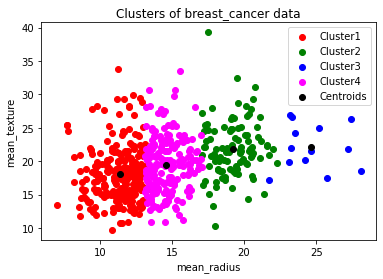

In [61]:
plt.scatter(df1["mean_radius"],df1["mean_texture"],color = "red",label = "Cluster1")
plt.scatter(df2["mean_radius"],df2["mean_texture"],color = "green",label = "Cluster2")
plt.scatter(df3["mean_radius"],df3["mean_texture"],color = "blue",label = "Cluster3")
plt.scatter(df4["mean_radius"],df4["mean_texture"],color = "magenta",label = "Cluster4")
plt.scatter(model.cluster_centers_[:,0],centers[:,1],color="black",label="Centroids")
plt.title("Clusters of breast_cancer data")
plt.xlabel("mean_radius")
plt.ylabel("mean_texture")
plt.legend()
plt.show()

## Result: Hence clusters are formed and centroids are depicted above.